In [242]:
import numpy as np
from numpy import invert
from numpy import transpose as T
from numpy.linalg import inv, norm
import matplotlib.pyplot as plt 

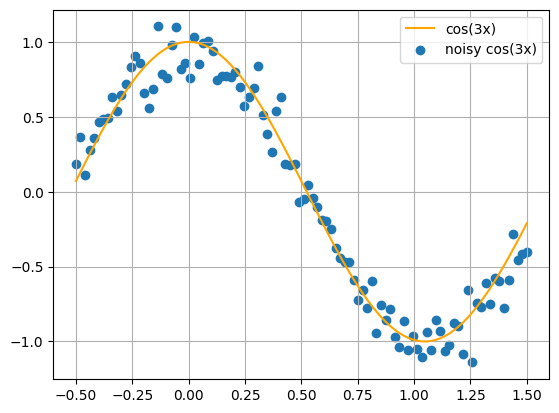

In [243]:
#### Problem 1 ####
x = np.linspace(-.5, 1.5, 100)
y = np.cos(3 * x)
noise = np.random.normal(0, 0.12, 100)

y_n = y + noise 

plt.plot(x, y, label = 'cos(3x)', color = 'orange')
plt.scatter(x, y_n, label = 'noisy cos(3x)')
plt.legend()
plt.grid()

plt.show()

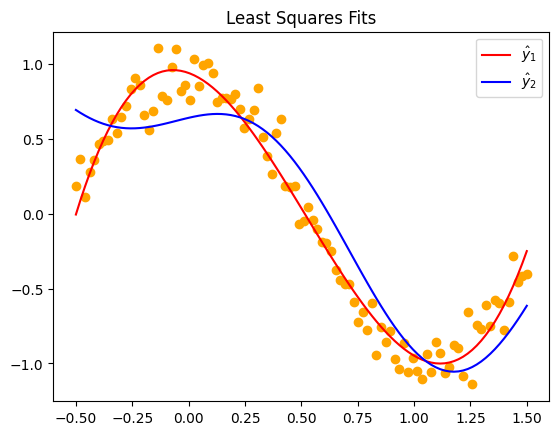

For the first fit: 
The L1 norm was 6.797387407843045 
The L2 norm was 0.7670289093334557 
The Linf norm was 0.12584961123085747

For the second fit: 
The L1 norm was 22.42384732276617 
The L2 norm was 2.554082468174563 
The Linf norm was 0.6216817583266077


In [244]:
vars1= np.empty((100, 4))
vars2 = np.empty((100, 4))

for i in range (0, 100):
    ix = x[i]
    vars1[i, 0] = 1 
    vars1[i, 1] = ix 
    vars1[i, 2] = 2 * ix**2 - 1
    vars1[i, 3] = 4 * ix**3 - 3 * ix 

    vars2[i,0] = np.cos(ix)**2 
    vars2[i,1] = 1 - 2*np.sin(ix)
    vars2[i,2] = np.cos(3*ix)*np.sin(ix) 
    vars2[i,3] = (3 - ix)/(3 + ix)


cHat1 = inv(T(vars1)@vars1)@T(vars1)@y_n
cHat2 = inv(T(vars2)@vars2)@T(vars2)@y_n


yHat1 = cHat1[0] + cHat1[1]*x + cHat1[2]*(2*x**2 - 1) + cHat1[3] * (4*x**3 - 3*x)
yHat2 = cHat2[0]*np.cos(x)**2 + cHat2[1]*(1 - 2*np.sin(x)) + cHat2[2]*(np.cos(3*x)*np.sin(x)) + cHat2[3]*((3 - x)/(3 + x))

plt.scatter(x, y_n, color = 'orange')
plt.plot(x, yHat1, label = '$\hat{y}_1$', color = 'red')
plt.plot(x, yHat2, label = '$\hat{y}_2$', color = 'blue')
plt.legend()

plt.title('Least Squares Fits')
plt.show()

#### Norms ####
res1 = yHat1 - y
res2 = yHat2 - y 

L11 = norm(res1, 1)
L21 = norm(res1, 2)
Linf1 = norm(res1, np.inf)

L12= norm(res2, 1)
L22 = norm(res2, 2)
Linf2 = norm(res2, np.inf)

print(f'For the first fit: \nThe L1 norm was {L11} \nThe L2 norm was {L21} \nThe Linf norm was {Linf1}')
print(f'\nFor the second fit: \nThe L1 norm was {L12} \nThe L2 norm was {L22} \nThe Linf norm was {Linf2}')



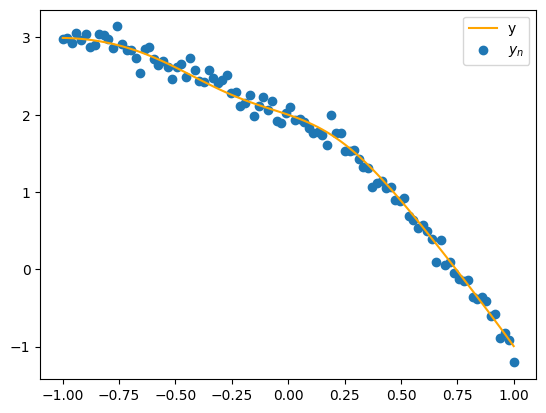

In [245]:
#### Problem 3 #####
x = np.linspace(-1, 1, 100)
y = 12 - x**2 - np.exp(-5*x**2)*np.sin(-x)-2*(5+x)
noise = np.random.normal(0, .1, 100)

y_n = y + noise

plt.plot(x, y, color = 'orange', label = 'y')
plt.scatter(x, y_n, label = '$y_n$')

plt.legend()

plt.show()

The estimated values after 20 iterations are as follows:
A = -2.0000001248293833
B = 0.9999999983717082
C = -0.9999999726094598
D = 4.999999696352141


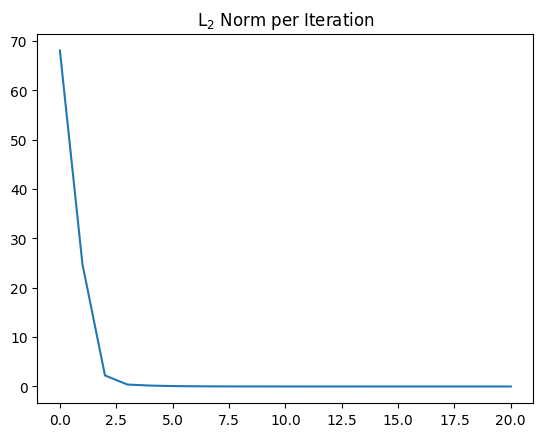

In [246]:

def f(x, ck):
    a, b, c, d = ck
    return (12 - b*x**2 - np.exp(-d*x**2)*np.sin(c*x)+a*(b*d-c*x))

def Jac(x, ck):
    a, b, c, d = ck
    return np.array([b*d - c*x, -x**2 + a*d,-np.cos(c * x) * x * np.exp(-d * x**2), 
                      np.exp(-d*x**2) * x**2 * np.sin(c * x) + a * b]).T



# # initial guess
ck = np.array([-2.2, .3, -1,5.2])
normList = []
iteration =[]
for i in range(0,1001):
    res = f(x, ck) - f(x, [-2, 1, -1, 5])
    cknew = ck - np.linalg.pinv(Jac(x,ck)) @ res
    ck = cknew

    iteration.append(i)
    normList.append(norm(res, 2))
    
    if norm(res, 2) < 1E-6: 
        print(f'The estimated values after {i} iterations are as follows:')
        print(f'A = {ck[0]}')
        print(f'B = {ck[1]}')
        print(f'C = {ck[2]}')
        print(f'D = {ck[3]}')

        plt.plot(iteration, normList)
        plt.title('L$_{2}$ Norm per Iteration')
        plt.show()

        break